In [1]:
import wandb
api = wandb.Api()

sweep_id = '7eejazi0'
sweep = api.sweep(f"nicoweio/dsea-corn/{sweep_id}")

f"{len(sweep.runs)} runs"

'725 runs'

In [2]:
sweep.runs[50].state

'crashed'

In [3]:
# filter successful runs
runs = filter(lambda run: run.state == 'finished', sweep.runs)

runs = sorted(runs,
  key=lambda run: run.summary.get("wd_test", 1), reverse=False)
wd_test = runs[0].summary.get("wd_test", 1)
print(f"Best run {runs[0].name} with {wd_test:.4f} wasserstein distance")

f"{len(runs)} non-crashed runs"

Best run zesty-sweep-35 with 0.0039 wasserstein distance


'87 non-crashed runs'

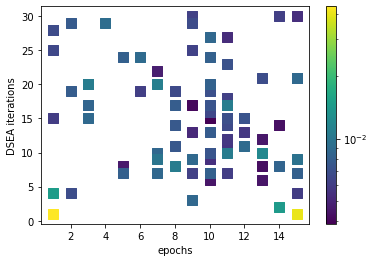

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

runs_epochs = np.array([run.config['num_epochs'] for run in runs])
runs_dsea_iterations = np.array([run.config['num_dsea_iterations'] for run in runs])
runs_wd = np.array([run.summary.get('wd_test', np.nan) for run in runs])

plt.scatter(runs_epochs, runs_dsea_iterations, c=runs_wd, s=100,marker='s', norm=matplotlib.colors.LogNorm())
plt.xlabel("epochs")
plt.ylabel("DSEA iterations")
plt.colorbar()
plt.show()

<module 'matplotlib.pyplot' from '/scratch/nweitkemper/envs/dsea/lib/python3.9/site-packages/matplotlib/pyplot.py'>

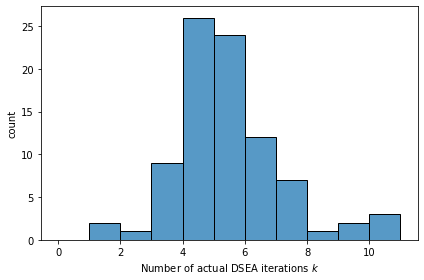

In [5]:
import seaborn as sns

runs_k = np.array([run.summary.get('k', np.nan) for run in runs])

sns.histplot(runs_k, bins=np.arange(0, runs_k.max()+1))
plt.xlabel("Number of actual DSEA iterations $k$")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("k.pdf")
plt

<module 'matplotlib.pyplot' from '/scratch/nweitkemper/envs/dsea/lib/python3.9/site-packages/matplotlib/pyplot.py'>

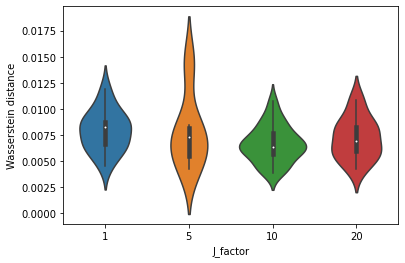

In [6]:
my_wd = [dict(**run.config, wd_test=run.summary['wd_test']) for run in runs if run.state == 'finished' and run.summary.wd_test <= 0.015]

# my_wd2 = {
#     'wd_test': [run['wd_test'] for run in my_wd],
#     'J_factor': [run['J_factor'] for run in my_wd],
# }

my_wd2 = {
    key: [run[key] for run in my_wd]
    for key in my_wd[0].keys()
}

# sns.histplot(wd_per_J_factor, stat="percent", common_norm=False, multiple="stack", shrink=.8)
sns.violinplot(data=my_wd2, x='J_factor', y='wd_test')
# sns.violinplot(data=my_wd2, x='num_dsea_iterations', y='wd_test')
plt.xlabel("J_factor")
plt.ylabel("Wasserstein distance")
# plt.savefig("wd_per_J_factor.pdf")
plt


In [8]:
sweep_fixweighting = api.sweep(f"nicoweio/dsea-corn/qwvk5wcy")

wd_per_fixweighting = {key: np.array([run.summary.get('wd_test', np.nan) for run in sweep_fixweighting.runs if run.state == 'finished' and run.config['fixweighting'] == key]) for key in ['always', 'iter', 'never']}

<module 'matplotlib.pyplot' from '/scratch/nweitkemper/envs/dsea/lib/python3.9/site-packages/matplotlib/pyplot.py'>

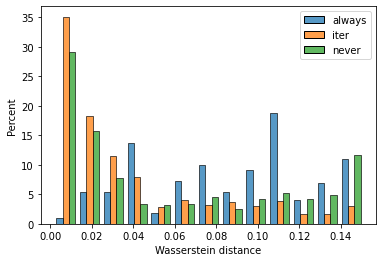

In [9]:
sns.histplot(wd_per_fixweighting, stat="percent", common_norm=False, multiple="dodge", shrink=.8)
plt.xlabel("Wasserstein distance")
plt.savefig("wd_per_fixweighting.pdf")
plt